In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ovarian = pd.read_csv('allMI.csv')

ovarian = ovarian.drop(['Unnamed: 0'], axis = 1)
ovarian = ovarian.dropna(axis=1, how='any')
print(ovarian.shape)

(100, 428)


In [2]:
from sklearn.model_selection import train_test_split
#following tutorials from sklearn 


X_train, X_test, y_train, y_test = train_test_split(ovarian.loc[:, ovarian.columns != 'Outcome'], ovarian['Outcome'], stratify=ovarian['Outcome'], test_size = 0.3, random_state=66)

X_train.head()

print(X_train)

    20.745237  20.830337  26.446717  26.542791  26.735461  27.220184  \
74   0.000000   0.000000   0.000000   0.000000   0.000628   0.000000   
32   0.000000   0.000000   0.000000   0.000000   0.000994   0.000000   
5    0.000000   0.000000   0.000000   0.000000   0.000567   0.000000   
54   0.000000   0.000000   0.000000   0.000000   0.000696   0.000000   
53   0.000277   0.000000   0.000000   0.000000   0.000887   0.000000   
9    0.000000   0.000000   0.000000   0.000000   0.001063   0.000000   
83   0.000000   0.000000   0.000000   0.000000   0.000693   0.000000   
99   0.000000   0.000000   0.000000   0.000000   0.000677   0.000000   
37   0.000000   0.000000   0.000000   0.000000   0.000828   0.000000   
93   0.000000   0.000000   0.000735   0.000000   0.000000   0.000000   
76   0.000000   0.000000   0.000574   0.000000   0.000000   0.000000   
4    0.000000   0.000000   0.000000   0.000000   0.000586   0.000000   
6    0.000000   0.000000   0.000000   0.000000   0.000551   0.00

In [3]:

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 5)
rfe = rfe.fit(X_train, y_train)


for i in range (1,427):
    if (rfe.support_[i]==True):
        print (i)


4
11
88
101
284


In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[  0.00000000e+00   4.69924812e-03   0.00000000e+00   0.00000000e+00
   2.46729832e-02   0.00000000e+00   7.61904762e-03   1.31868132e-04
   5.07936508e-03   0.00000000e+00   0.00000000e+00   1.26404889e-02
   1.60416667e-02   0.00000000e+00   0.00000000e+00   3.26369283e-03
   7.99200799e-05   6.04686319e-05   0.00000000e+00   0.00000000e+00
   0.00000000e+00   4.66550993e-03   5.71428571e-03   0.00000000e+00
   7.86394558e-03   5.08843537e-03   5.00432900e-03   2.99606112e-02
   2.99356725e-02   0.00000000e+00   0.00000000e+00   3.15592904e-03
   0.00000000e+00   0.00000000e+00   3.80952381e-03   0.00000000e+00
   9.99925040e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.45918560e-03   0.00000000e+00   3.04761905e-03   5.85460851e-03
   2.99171843e-03   0.00000000e+00   0.00000000e+00   1.81405896e-04
   0.00000000e+00   1.75670320e-02   2.52847806e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   4.20779221e-03

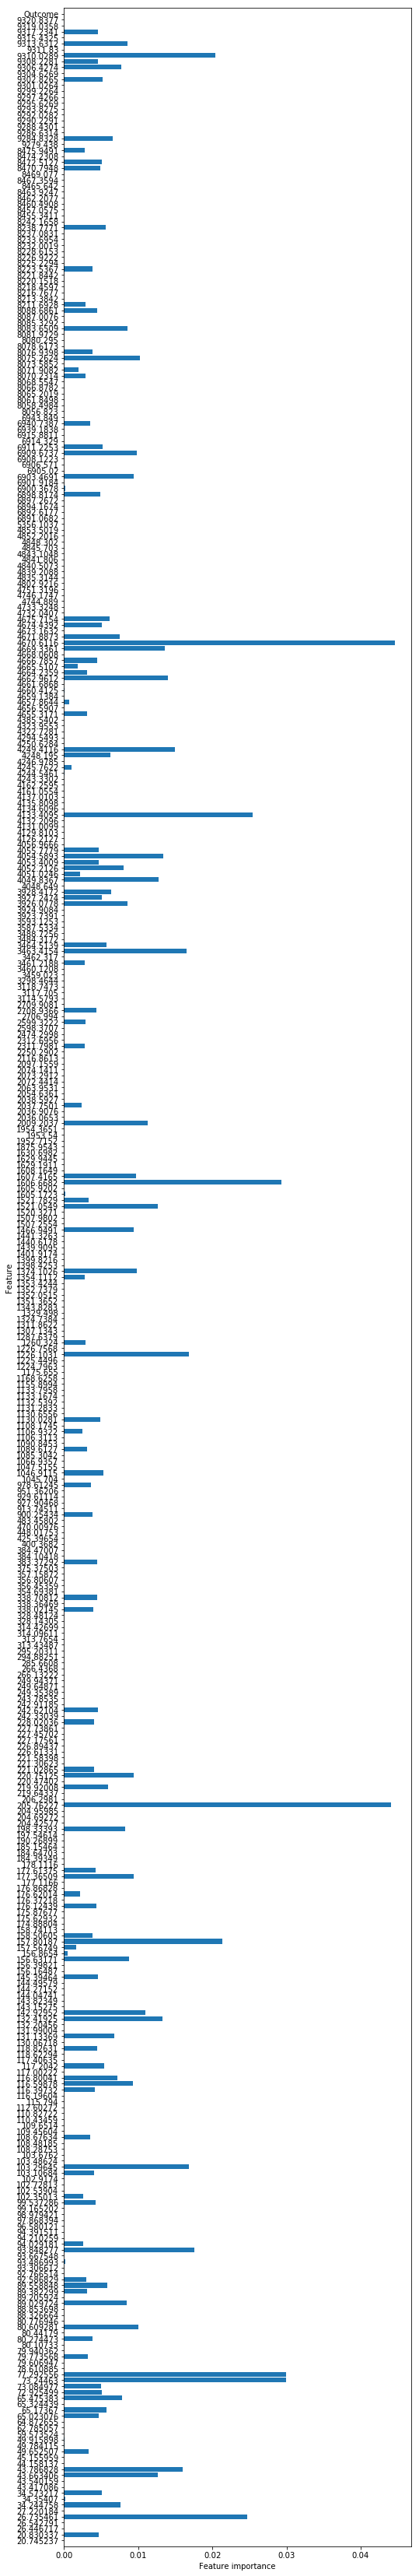

In [13]:
ovarian_features = [x for i,x in enumerate(ovarian.columns) if i!=8]

def plot_feature_importances_ovarian(model):
    plt.figure(figsize=(8, 60))
    n_features = 427
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ovarian_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.savefig('svmrfe.png')
plot_feature_importances_ovarian(model)

#plt.savefig('svmrfe.png')

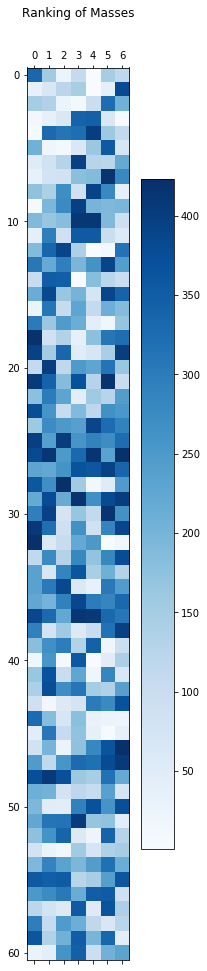

In [15]:
ranking = rfe.ranking_.reshape(61, 7)

plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of Masses")
plt.show()


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)    
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[ 0.83333333  0.83333333  1.          0.66666667  0.83333333]
Accuracy: 0.83 (+/- 0.21)


In [24]:
ovarian_features = ovarian.iloc[:, [4, 11, 88, 101, 284, 427]]
ovarian_features.head()


,26.735461,43.540159,132.20456,157.56749,4053.4009,Outcome
0,0.000742,0.0,0.000454,0.0,0.0,0
1,0.000553,0.0,0.000000,0.0,0.0,0
2,0.000638,0.0,0.000000,0.0,0.0,0
3,0.000662,0.0,0.000000,0.0,0.0,0
4,0.000586,0.0,0.000000,0.0,0.0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(ovarian_features.loc[:, ovarian_features.columns != 'Outcome'], ovarian_features['Outcome'], stratify=ovarian_features['Outcome'], test_size = 0.3, random_state=66)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.67


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
C_range = np.logspace(-2, 10, 13)

gamma_range = np.logspace(-9, 3, 13)

#gamma_range = np.append(gamma_range, np.logspace(-4, 3, 8))
param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, n_jobs)
grid = GridSearchCV(SVC(), param_grid=param_grid,  n_jobs=1)
grid_result = grid.fit(X_train_scaled, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

0.614286 (0.022826) with: {'C': 0.01, 'gamma': 1.0000000000000001e-09}
0.614286 (0.022826) with: {'C': 0.01, 'gamma': 1e-08}
0.685714 (0.078414) with: {'C': 0.01, 'gamma': 9.9999999999999995e-08}
0.657143 (0.080130) with: {'C': 0.01, 'gamma': 9.9999999999999995e-07}
0.642857 (0.059697) with: {'C': 0.01, 'gamma': 1.0000000000000001e-05}
0.642857 (0.059697) with: {'C': 0.01, 'gamma': 0.0001}
0.642857 (0.059697) with: {'C': 0.01, 'gamma': 0.001}
0.642857 (0.059697) with: {'C': 0.01, 'gamma': 0.01}
0.671429 (0.076770) with: {'C': 0.01, 'gamma': 0.10000000000000001}
0.800000 (0.025269) with: {'C': 0.01, 'gamma': 1.0}
0.771429 (0.017274) with: {'C': 0.01, 'gamma': 10.0}
0.685714 (0.074522) with: {'C': 0.01, 'gamma': 100.0}
0.585714 (0.067512) with: {'C': 0.01, 'gamma': 1000.0}
0.614286 (0.022826) with: {'C': 0.10000000000000001, 'gamma': 1.0000000000000001e-09}
0.614286 (0.022826) with: {'C': 0.10000000000000001, 'gamma': 1e-08}
0.685714 (0.078414) with: {'C': 0.10000000000000001, 'gamma': 9

In [21]:
svc = SVC(C=0.01,gamma = 1)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.67


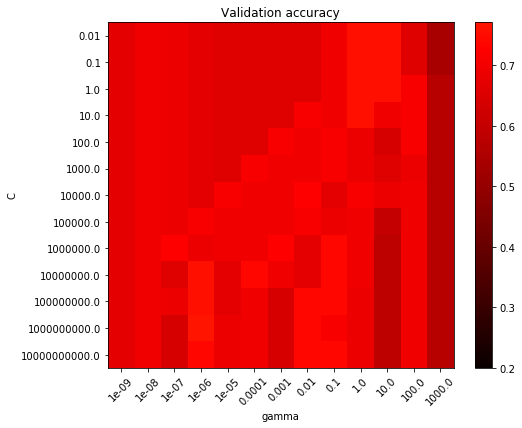

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_train_scaled, y_train)
        classifiers.append((C, gamma, clf))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

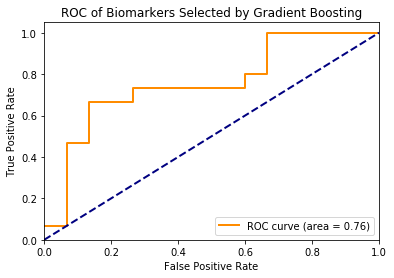

In [23]:
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

svc2 = OneVsRestClassifier(svm.SVC( C=1000000000.0 ,gamma = 9.9999999999999995e-07))
y_score = svc2.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
y_test.head()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Biomarkers Selected by Gradient Boosting')
plt.legend(loc="lower right")
plt.show()